<center>
<h1>CSCI3151 - Foundations of Machine Learning - Fall 2024</h1>
<h2>Assignment 1</h2>

<b> Due on: 13 September at 23:59 ADT</b>

[Assignment Submission Instructions as given on BrightSpace](https://dal.brightspace.com/d2l/le/content/342520/viewContent/4477501/View)
</center>



## 1. Vectors, hyperplanes, and projections (6 pts)

<small>*Marking Notes: The sub-part marked (***) is A-level, and as such, might not have been covered in the review session. However, it is entirely doable with solid reasoning using the concepts leading up to it, and especially along with the hint we have provided.*</small>

**Overview**: This is a linear algebra question in which you will need to derive the general equation for how to find the perpendicular projection of a 3D point onto a plane. This is a math derivation question (not implementation).

**Rationale**: Linear and non-linear projections are core concepts for ML. (Ask an LLM if you want more details!) So we start with linear projection here, because it is the foundation for most other projections.
<br/>
<br>

Consider a vector space of two dimensions $(x_1, x_2)$, a point $A=(1,2)$ and a vector $\mathbf{v} = (1, 1)$.


(a) What is the point defined by $\mathbf{v}$ considered as a position vector?

If you move by one unit of length from point $A$ in the direction of $\mathbf{v}$, what is the new point $B$ you will arrive at?

**Answer 1(a)**


Since the magnitude of our vector isn't 1, we would have to normalize it.

Unit Vector = (1 , 1) / ($\sqrt{1 + 1}$)

= (1/($\sqrt(2)$),  1/($\sqrt(2)$))

A + 1*U = (1 + 1 / $\sqrt(2)$) , (2 + 1 / $\sqrt(2)$)

= (1 + 0.70, 2 + 0.70)

= (1.70, 2.70)

(b) What is the position vector of a point $P$ derived by moving from point $A$ along $\mathbf{v}$ by a distance $s$? The result is a parametric representation of a line, where the parameter is $s$. The line contains $A$ and it is parallel to vector $\mathbf{v}$.

**Answer 1(b)**

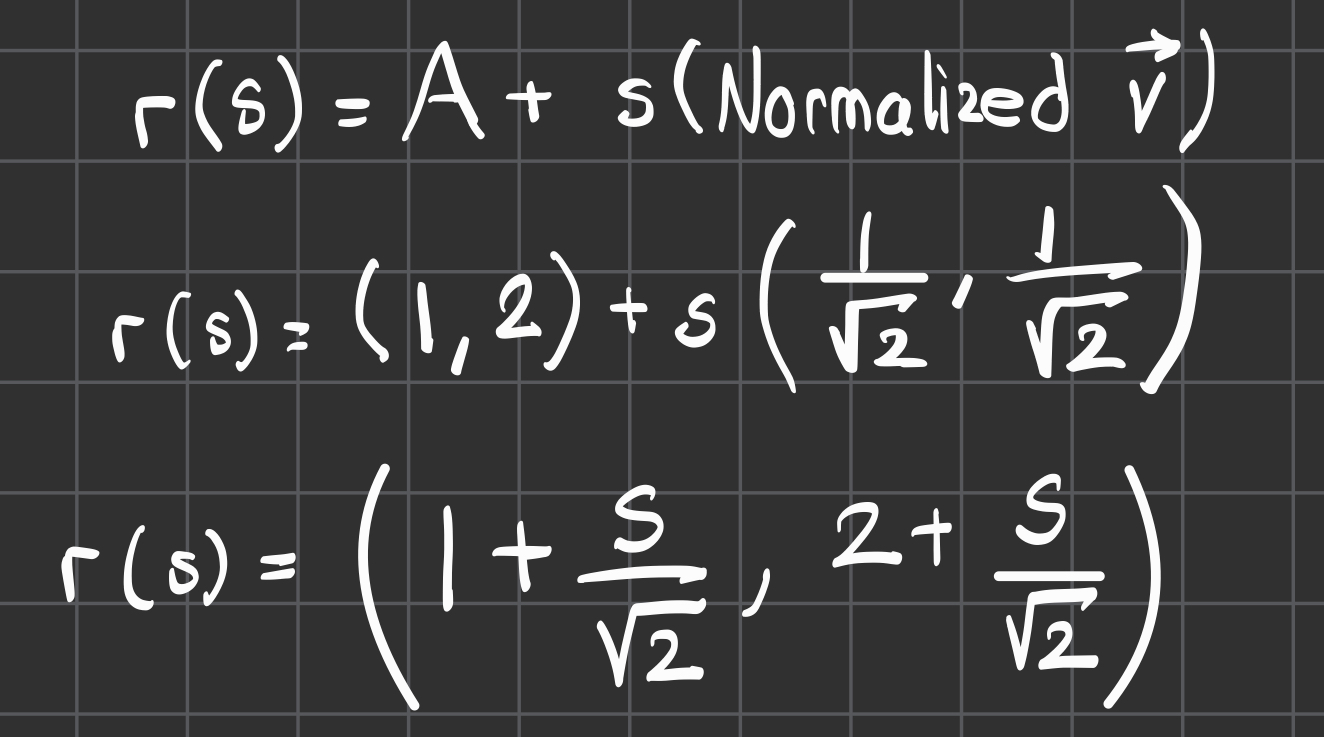



(c) Find vector $\mathbf{u}$ that is perpendicular to vector $\mathbf{v}$ above.

**Answer 1(c)**

For two vectors to be perpendicular, their dot product must be 0.

(1,1) . (a,b) = 0

1 x a + 1 x b = 0

a + b = 0

Ex. $\mathbf{u}$ = (2, -2)

(d) You are given

- a point $A: (a_1, a_2)$ (not the same from part (a)),
- a vector $\mathbf{u}$
- a line $L$ passing through $A$, such that $L$ is perpendicular to $\mathbf{u}$.

Find the equation of a point $P (y_1, y_2)$ on $L$ such that every point on $L$ must satisfy, and only points on $L$ satisfy.

Reduce this equation to the form $ay_1 + by_2 = 1$, where $a$ and $b$ are in terms of $A$ and $\mathbf{u}$.

*Hint: the inner product of vector $\mathbf{u}$ and a vector parallel to the line is zero.*

**Answer 1(d)**



(e) Generalize part (d) to a plane in three dimensions, i.e. given point $A$, a vector $\mathbf{u}$, and a plane $H$ passing through $A$, such that $H$ is perpendicular to $\mathbf{u}$, provide a vector equation that every point $P$ on the plane must satisfy.

Can you reduce this equation to the form $ay_1 + by_2 + cy_3 = 1$, where $y_1, y_2, y_3$ are the coordinates of $P$?

 *Hint: the inner product of vector $\mathbf{u}$ with a vector parallel to the plane is zero.*



**Answer 1(e)**

(f) (***) Consider a plane in three dimensions defined by a point $A$ and a normal vector $\mathbf{u}$, i.e. perpendicular to the plane. Given a point $B$ not on the plane, find the projection $B'$ of point $B$ onto the plane.

*Hint: You can make use of two properties about projection $B′$ :  $AB'$ being parallel to the plane and $BB'$ being parallel to vector $\mathbf{u}$.*

**Answer 1(f)**

## 2. Mean, Variance and Entropy (5 pts)

<small>
Notes: This question exposes you to concepts which we will cover in detail in the near future. For now, most of this question is mechanical, simply to give you exposure, and to give you practise using little bits of pre-written code. The last part (estimating entropy for a continuous distribution) is A-level and requires understanding and problem-solving, and we therefore recommend you do that question after you have done everything else in this assignment.</small>

**Relevant definitions to be given in class**:
* expected value of a random variable
* how to estimate the expected value empirically
* variance of a random variable
* how to estimate the variance empirically
* entropy of a random variable

**Overview**:
Here you will be given some functions (written by us) that generate random numbers, and others that compute functions of those random numbers. Together, these functions give rise to probability distributions over real numbers. You will then be required to write code to empirically estimate quantities such as the mean, variance, and entropy of these distributions. You may also be asked do some further analysis (both experimental and/or analytical) of these computed quantities (e.g. examine the variance of these estimates, etc).

In this question the black box functions are functions that are provided to you which you do not need to devote time to understanding or modify in any way.
Three of the functions will return a list of `n` random floating point numbers on the interval [0, 1], where `n` is an integer parameter of the function.

The other two functions simulate rolling fair and loaded dice. That is, they each return an integer in the set {1,2,3,4,5,6}. For the loadedDice function, `probabilities` corresponds to the probabilities of rolling a 1,2,3,4,5, or 6. The default value is that there is a 50% chance of rolling a 1, and a 10% chance of rolling any of the other numbers.

(a) (\*) [2 marks] Given the five black box generator functions below, compute the expected value and variance of the values returned by each function. Make sure to compute the expected value numerically by using the generated samples (as discussed in class). This is referred to as the *empirical estimate* of the expected value and variance.

In [3]:
###################### DO NOT EDIT ######################
import numpy as np

rng = np.random.default_rng(261325928446694869112420952826835439449)

# Continuous distributions
def bb1(n):
    return rng.random(n)

def bb2(n):
    return rng.triangular(0, 0.87645, 1, n)

def bb3(n):
    return rng.power(0.587621, n)

# Discrete distributions
def fair6sidedDice(n):
    return rng.integers(1, 7, n)

def loaded6sidedDice(probabilities=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1], n=1):
    return rng.choice([1, 2, 3, 4, 5, 6], p=probabilities, size=n)

# The parameter n controls the number of samples generated, e.g.
#      data = bb1(100)
# will generate 100 samples from the first black box function

In [45]:
# your code here

sampleCount = 10
arr1 = bb1(sampleCount)
arr2 = bb2(sampleCount)
arr3 = bb3(sampleCount)
arr4 = fair6sidedDice(sampleCount)
arr5 = loaded6sidedDice(n=sampleCount)


print(f'Array 1 is: {arr1}')
print(f'Array 2 is: {arr2}')
print(f'Array 3 is: {arr3}')
print(f'Array 4 is: {arr4}')
print(f'Array 5 is: {arr5}')


def calculateVariance(arr):
    return np.var(arr)

def calculcateEV(arr):
    return np.mean(arr)

print(f'\nBB1: Expected Value: {calculcateEV(arr1)}. Variance: {calculateVariance(arr1)}')
print(f'\nBB2: Expected Value: {calculcateEV(arr2)}. Variance: {calculateVariance(arr2)}')
print(f'\nBB3: Expected Value: {calculcateEV(arr3)}. Variance: {calculateVariance(arr3)}')
print(f'\nFair Six Sided Dice: Expected Value: {calculcateEV(arr4)}. Variance: {calculateVariance(arr4)}')
print(f'\nLoaded Six Sided Dice: {calculcateEV(arr5)}. Variance: {calculateVariance(arr5)}')








Array 1 is: [0.10898441 0.22580267 0.91347633 0.6047191  0.96377323 0.07667601
 0.92136361 0.59624057 0.94011948 0.59537488]
Array 2 is: [0.28728498 0.81950762 0.36637502 0.84866706 0.61483639 0.64688605
 0.87320501 0.65039805 0.7816434  0.97958109]
Array 3 is: [0.02540216 0.43098367 0.02994399 0.1298691  0.12587549 0.21561192
 0.71667051 0.1067941  0.90364647 0.0606147 ]
Array 4 is: [1 3 2 2 6 6 3 6 5 2]
Array 5 is: [2 1 1 1 4 1 1 5 1 3]

BB1: Expected Value: 0.5946530295328196. Variance: 0.11043140494540209

BB2: Expected Value: 0.6868384659585575. Variance: 0.044365651702940226

BB3: Expected Value: 0.2745412097459853. Variance: 0.08580318756228127

Fair Six Sided Dice: Expected Value: 3.6. Variance: 3.4400000000000004

Loaded Six Sided Dice: 2.0. Variance: 2.0


**Enter your results into the table below**:

|                	| bb1 	| bb2 	| bb3 	| fair | loaded |
|----------------	|-----	|-----	|-----	|----- | ----- |
| Expected Value 	|   0.5946530295328196  	|   0.6868384659585575  	|   0.2745412097459853  	|  3.6.    |    3.4400000000000004   |
| Variance       	|    0.11043140494540209 	|   0.044365651702940226  	|   0.08580318756228127  	|   2.0   |   2.0   |

(b) [2 marks] The loaded dice simulator takes in a set of probabilities for each of the 6 sides. For example, the default probability given above is that $p=\frac{1}{2}$ of rolling a 1, and $p=\frac{1}{10}$ of rolling any of the other numbers. Write a function which takes a probability distribution over the 6 sides (i.e. a list of 6 probability values that sum to 1), and computes the entropy of that distribution.

In [31]:
# your code here
import math

def compute_entropy(probabilities):
    #your code here

    total = 0

    for i in range(6):
        if (probabilities[i] > 0):
            val = probabilities[i] * math.log(probabilities[i], 2)
            total += val
    
    total = -total

    return total

In [30]:
############# DO NOT EDIT ###############
# TESTING YOUR ENTROPY FUNCTION

compute_entropy([0.5,0.1,0.1,0.1,0.1,0.1])
compute_entropy([1.0,0.,0.,0.,0.,0.])
compute_entropy([0.166,0.167,0.166,0.167,0.166,0.167])


2.5838130130371564

(c) (***) [1 mark] Estimate the entropy of each of the distributions produced by `bb1`, `bb2`, and `bb3`.

*Hint: The calculation of the entropy depends on knowing the underlying probability distribution, which is why we wrote "estimate" the entropy. One way to do this is by discretizing the space using bins. You may discuss this further on Teams if you wish.*

In [ ]:
# your code here

## 3. Synthetic Clustered Dataset (3 pts)

**Related topics covered in-class**:
* numpy gaussian generator
* synthetic data *is* how you debug ML!

**Overview**: You will be asked to use numpy’s gaussian number generator to generate a “synthetic” dataset of multiple clusters, where we will provide you with the specifications of that dataset (e.g. the dimensionality, the means, etc). You will plot your synthetic dataset.

**Rationale**: (1) One of the most important debugging techniques in ML begins by creating synthetic data. This often involves defining and sampling multi-dimensional Gaussian distributions. Here, we start with simple 2D circular distributions. (2) This is a mechanical question, to give you experience using a library function that samples from a Gaussian distribution. You do not need to understand much about the Gaussian distribution yet, other than what will be mentioned in class, and looking up a bit of numpy documentation. We will discuss them in detail, along with the underlying math, later in the term. For now, you just get to play around with calling the function!

a) Use numpy’s gaussian number generator to generate a “synthetic” dataset of the 3 circular clusters with means (10, 0), (0, 6) and (3, 1).

In [377]:
# Your code here

num = 1000

x1 = np.random.normal(loc=10, size=num)
y1 = np.random.normal(loc=0, size=num)
x2 = np.random.normal(loc=0, size=num)
y2 = np.random.normal(loc=6, size=num)
x3 = np.random.normal(loc=3, size=num)
y3 = np.random.normal(loc=1, size=num)

b) Plot your dataset from a) -- it should look like the plot shown.

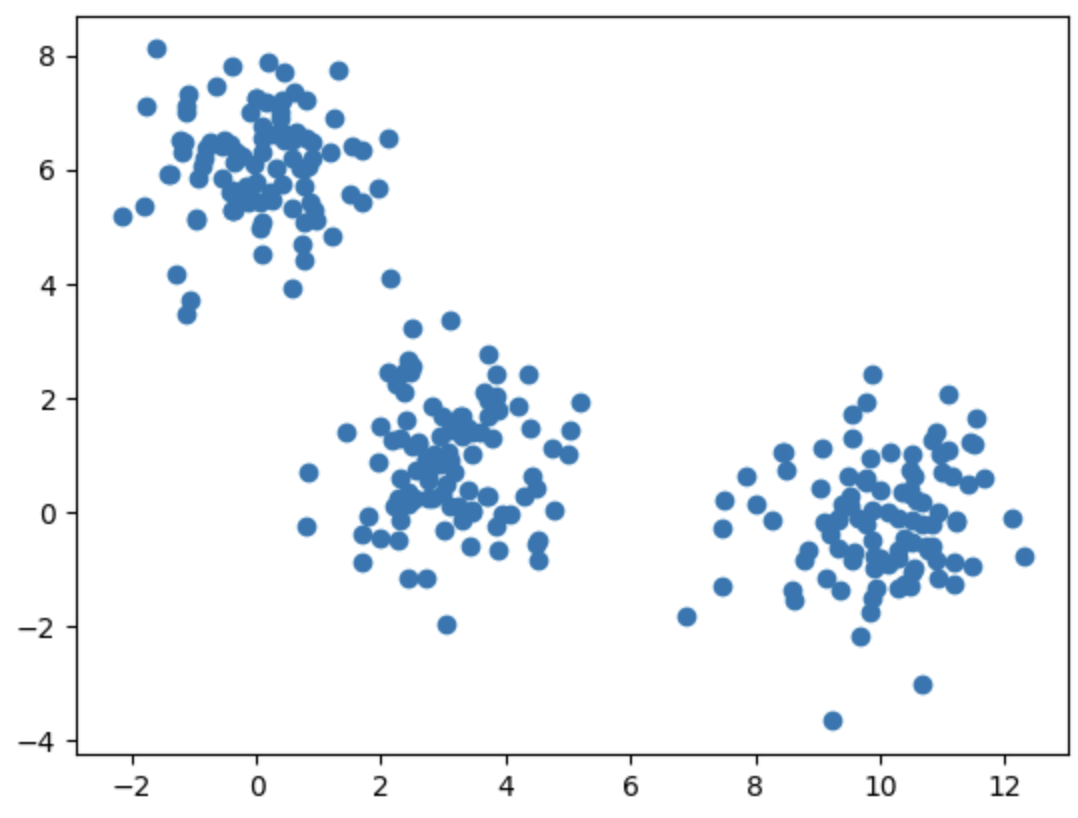



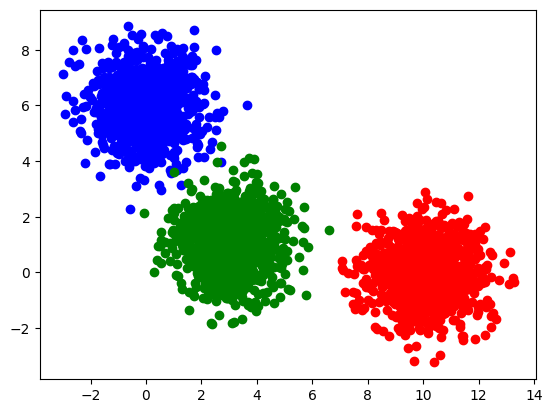

In [378]:
# Your plot here

import matplotlib.pyplot as plt

plt.scatter(x1,y1, color="red")
plt.scatter(x2,y2, color="blue")
plt.scatter(x3,y3, color="green")

plt.show()


## 4. KNN (5 pts)

You will implement the k-nearest neighbours algorithm, and use validation to choose your hyper-parameter. You will test your algorithm on the datasets you created in Question 3, and we will test your algorithm by running it on a separate dataset (i.e. a dataset that is not provided to you; loosely simulating typical competition scenarios).

a) Implement the k-nearest neighbours algorithm. Recall that the algorithm works as follows:
<br>(1) Find the distance between a given test point and all existing data points.
<br>(2) For each test point, pick the $k$ closest points.
<br>(3) Have the points vote to determine the class of the test point.
Pick the class with the majority of nearest neighbours, breaking ties arbitrarily (or by closest point).

Note that to make it efficient with numpy, the fewer `for` loops you use, the better. (Classifying a single point can certainly be done with no for loops at all).

In [368]:
# Your code here

import math

def knn_classifier(train, val_cords, k):

  def find_distance(a, b):
        return math.sqrt(((a[0]-b[0])**2) + ((a[1]-b[1])**2))

  pred = []

  for val_cord in val_cords:
    distances = []
    

    for train_p in train:
      train_cord = train_p[:2]
      train_class = train_p[2]
      distance = find_distance(train_cord, val_cord)
      distances.append((distance, train_class))

    classes = [0] * 3
    
    #Sort it
    distances.sort(key=lambda x:x[0])

    #Get the k minimimum distances
    k_min_distances = distances[:k]

    #Keep a tally of the classes and select the one that occurs the most.
    for i in range(len(k_min_distances)):
       classes[int(k_min_distances[i][1])] += 1

    class_pred = classes.index(max(classes))

    pred.append(class_pred)
       
  return pred

def find_distance(a, b):
  distance = math.sqrt(((a[0]-b[0])**2) + ((a[1] - b[1])**2))
  return distance


b) Split the dataset you created in Question 3 into a train and validation set. Plot the training and validation loss for different values of k, and use those plots to discuss which k value is optimal.

[0.0, 0.0016666666666666668, 0.00125, 0.0016666666666666668, 0.00125, 0.00125, 0.00125, 0.00125, 0.0016666666666666668, 0.00125, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.0016666666666666668, 0.0020833333333333333, 0.0025, 0.0020833333333333333, 0.0020833333333333333, 0.0020833333333333333, 0.00125, 0.0016666666666666668, 0.0020833333333333333, 0.0020833333333333333, 0.0016666666666666668, 0.0016666666666666668, 0.00125, 0.0016666666666666668, 0.00125, 0.00125] [0.0033333333333333335, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0, 0.0016666666666666668, 0.0, 0.0, 0.0, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0.0016666666666666668, 0

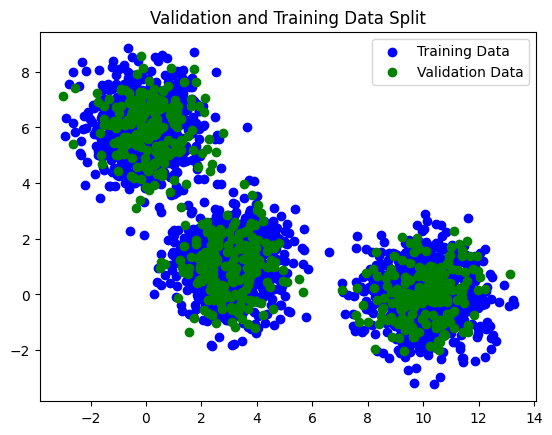

In [404]:
# Your code here

## TRAINING DATA
clus1 = np.column_stack((x1,y1))
clus2 = np.column_stack((x2,y2))
clus3 = np.column_stack((x3,y3))


x_train = np.vstack((clus1, clus2, clus3))
y_train = np.array([0]*len(clus1) + [1]*len(clus2) + [2]*len(clus3))

train = np.column_stack((x_train, y_train))

np.random.shuffle(train)

## VALIDATION DATA
np.random.seed(42)
indices = np.random.choice(train.shape[0], size=int(len(clus1) * 3 / 5), replace=False)
val = train[indices]
train = np.delete(train, indices, axis=0)


x_train = train[:, 0]
y_train = train[:, 1]

x_val = val[:, 0]
y_val = val[:, 1]

train_classes = train[:, 2]


# CALCULATE PRECISION
def accuracy(predictions, actual_classes):
    correct = 0

    for i in range(len(predictions)):
        if predictions[i] == actual_classes[i]:
            correct += 1
       
    return (correct/len(predictions))

val_features = val[:, :2]
val_classes = val[:, 2]

def compute_loss(predictions, actual_classes):
    wrong = 0

    for i in range(len(predictions)):
        if predictions[i] != actual_classes[i]:
            wrong += 1
    return wrong / len(actual_classes)

def eval(train, val_features, k_array):
    train_loss = []
    val_loss = []


    for k in k_array:
        pred_output = knn_classifier(train, val_features, k)
        loss = compute_loss(pred_output, val_classes)
        val_loss.append(loss)

        pred_output = knn_classifier(train, train, k)
        loss = compute_loss(pred_output, train_classes)
        train_loss.append(loss)


    return train_loss, val_loss


    

# TESTING DIFFERENT VALUES FOR k
train_losses, val_losses = eval(train, val_features, list(range(1, 30)))



# Your plots here

plt.scatter(x_train, y_train, color="blue", label="Training Data")
plt.scatter(x_val, y_val, color="green", label="Validation Data")

plt.legend()

plt.title('Validation and Training Data Split')

plt.show()



(0.0, 0.0033333333333333335)

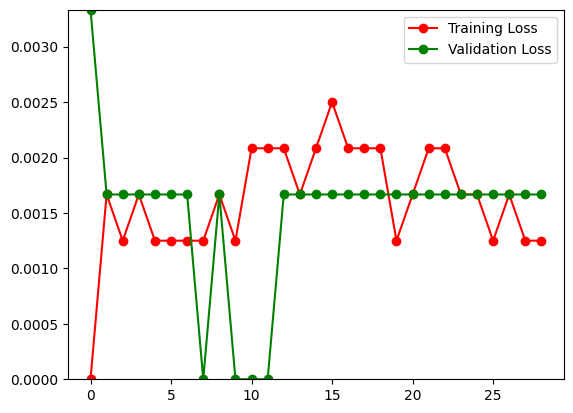

In [406]:
idx = list(range(len(train_losses)))

plt.plot(idx, train_losses, marker='o', linestyle='-', color='red', label="Training Loss")
plt.plot(idx, val_losses, marker='o', linestyle='-', color='green', label="Validation Loss")

plt.legend()

plt.ylim(0, max(max(train_losses),max(val_losses)))



Your answer here

## 5. KNN in High Dimensions (4pts)
[adapted from a question by R. Grosse]

**Overview**: In this question you will explore the effects of high-dimensionality on the potential behaviour of KNN.

**Advance Discussion**: You can do parts (a)--(c) right away, and part of (d), but before you can answer the very last question, we will first discuss this topic in class.



(a) Let $\mathbf{C}_2 = [0,1] \times [0,1]$ be the 2-D unit square. Write a function that samples 100 points uniformly from $\mathbf{C}_2$. (You can use the `numpy.random.rand()` function to do this). Compute the Euclidean distance between all pairs of points. Plot a histogram of the distances. Use `np.mean` and `np.std` to compute the average distance and the standard deviation.


In [ ]:
# your code here



(b) Do the same as in part (a), but instead of sampling from the 2-D square, sample from the 4-D cube: $\mathbf{C}_4 = [0,1] \times [0,1] \times [0,1] \times [0,1]$.

In [ ]:
# your code here

(c) Now write a function that computes the average distance and standard deviation for a set of $n$ points sampled from a $d$-dimensional cube, where $n$ and $d$ are the input parameters to the function. Using $n=100$, compute these statistics for $d \in \{ 2^0, 2^1, \ldots, 2^{10} \}$.

In [ ]:
# your code here

(d) (***) Finally, plot in a graph the values that you computed above. That is, the horizontal axis will represent $log_2 ( $dimensionality$)$, and the vertical axis will represent the mean distance and the standard deviation. Discuss how this relates to the comments made in class about distances in high-dimensional spaces.

Your answer goes here

(e) (***) Bonus: If you wish to try a more theoretical question about this, please contact me (Dr. Oore) directly after class or on Teams, at least one day before the assignment is due, and after you have completed the rest of the assignment.